In [3]:
########## Ignoring the warnings ##################
import warnings
warnings.filterwarnings("ignore")
######### Importing necessary libraries to built LeNet Model ########################
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.models import load_model
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam , SGD

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
########### Loading mnist dataset(handwritten digits) ##########################
(X_train, y_train), (X_test, y_test)= mnist.load_data()

##### Or If you have in your local system then ########################3
# def load_data(path):
#     with np.load(path) as f:
#         x_train, y_train = f['x_train'], f['y_train']
#         x_test, y_test = f['x_test'], f['y_test']
#         return (x_train, y_train), (x_test, y_test)

# (X_train, y_train), (X_test, y_test) = load_data('mnist.npz')

print('xtrain, ytrain shape:', (np.shape(X_train), np.shape(y_train)), '\n', 'xtest, ytest shape:', (np.shape(X_test), np.shape(y_test)),sep='')

11493376/11490434 [==============================] - 1s 0us/step
xtrain, ytrain shape:((60000, 28, 28), (60000,))
xtest, ytest shape:((10000, 28, 28), (10000,))


#### Here, we have 60000 handwritten images for training and 10000 handwritten images for testing
#### Let's how its look like

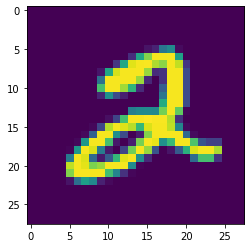

In [6]:
plt.imshow(X_train[5])

#### The above handwritten image is of 2 and size is 25x25

In [0]:
###### Performing Normalization ##########
X_train = X_train / 255
X_test = X_test / 255

In [0]:
###### Performing Normalization ##########
X_train = np.reshape(X_train,(X_train.shape[0],28,28,1))
X_test = np.reshape(X_test,(X_test.shape[0],28,28,1))

In [9]:
print(np.unique(y_train))
classes=len(np.unique(y_train))
print('classes',len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
classes 10


In [10]:
############ One Hot Encoding for targer column #################
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)
print('ytrain shape:', np.shape(y_train), '\n', 'ytest shape:', np.shape(y_test),sep='')

ytrain shape:(60000, 10)
ytest shape:(10000, 10)


In [11]:
print('xtrain, ytrain shape:', (np.shape(X_train), np.shape(y_train)), '\n', 'xtest, ytest shape:', (np.shape(X_test), np.shape(y_test)),sep='')

xtrain, ytrain shape:((60000, 28, 28, 1), (60000, 10))
xtest, ytest shape:((10000, 28, 28, 1), (10000, 10))


#### 1) Orignal LeNet

In [12]:
########### Creating sequential model of Orignal LeNet ##########################
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# P2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# P4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(),loss=categorical_crossentropy,metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

![lenet1](img/summaryLeNet.jpg)

In [27]:
# model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=3)
history = model.fit(x=X_train,y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0744 - accuracy: 0.9793 - val_loss: 0.0734 - val_accuracy: 0.9789
Epoch 2/10
 - 2s - loss: 0.0710 - accuracy: 0.9801 - val_loss: 0.0700 - val_accuracy: 0.9791
Epoch 3/10
 - 2s - loss: 0.0682 - accuracy: 0.9810 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 4/10
 - 2s - loss: 0.0656 - accuracy: 0.9816 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 5/10
 - 2s - loss: 0.0629 - accuracy: 0.9827 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 6/10
 - 2s - loss: 0.0605 - accuracy: 0.9834 - val_loss: 0.0617 - val_accuracy: 0.9811
Epoch 7/10
 - 2s - loss: 0.0582 - accuracy: 0.9842 - val_loss: 0.0605 - val_accuracy: 0.9810
Epoch 8/10
 - 2s - loss: 0.0563 - accuracy: 0.9844 - val_loss: 0.0599 - val_accuracy: 0.9805
Epoch 9/10
 - 2s - loss: 0.0544 - accuracy: 0.9849 - val_loss: 0.0576 - val_accuracy: 0.9822
Epoch 10/10
 - 2s - loss: 0.0526 - accuracy: 0.9853 - val_loss: 0.0582 - val_accuracy: 0.9816


In [31]:
score = model.evaluate(X_test, y_test)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])

print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1] * 100))

Test loss 0.0764, accuracy 97.86%


In [0]:
import pickle
filehandler = open("historyLenet.pkl","wb")
pickle.dump(history,filehandler)
filehandler.close()
model.save_weights("LeNet_Mnist_model.hdf5")

In [0]:
# from keras.models import load_model
# model=load_model("LeNet_Mnist_model.h5")

In [34]:
for i in history.history:
    print(i)

val_loss
val_accuracy
loss
accuracy


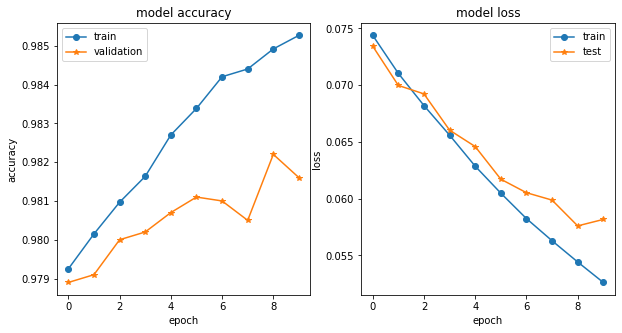

In [50]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],'-o')
    plt.plot(history.history['val_accuracy'],'-*')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    # plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'],'-o')
    plt.plot(history.history['val_loss'],'-*')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

#### 2) Modified LeNet

In [51]:
########### Creating sequential model of Modified LeNet ##########################
model2=Sequential()
model2.add(Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(120,activation='relu'))
model2.add(Dense(84,activation='relu'))
model2.add(Dense(classes,activation='softmax'))
opt = Adam()
model2.compile(optimizer=opt,loss=categorical_crossentropy,metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [52]:
history2=model2.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test, y_test),verbose=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [53]:
score2 = model2.evaluate(X_test, y_test)
print('Test Loss:', score2[0])
print('Test accuracy:', score2[1])

10000/10000 [==============================] - 1s 56us/step
Test Loss: 0.03763265782278213
Test accuracy: 0.988099992275238


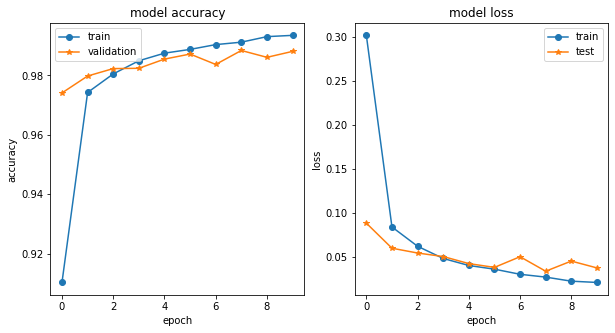

In [54]:
plot_accuracy_loss(history2)

**Comparision Of LeNet architecture accuracy and loss**

Accuracy improvement in model2 is 0.961438% as compared to model1


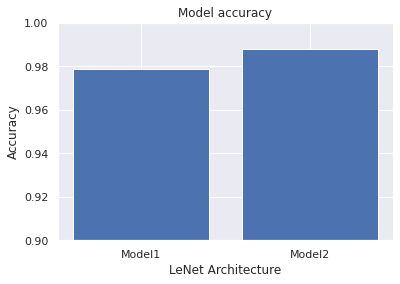

In [70]:
import seaborn as sns
sns.set()
plt.bar(['Model1','Model2'],[score[1],score2[1]])
plt.ylim([0.9, 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('LeNet Architecture')
print("Accuracy improvement in model2 is {:2f}% as compared to model1".format(((score2[1]-score[1])/score2[1])*100))

Loss reduction in model2 is 50.745887% as compared to model1


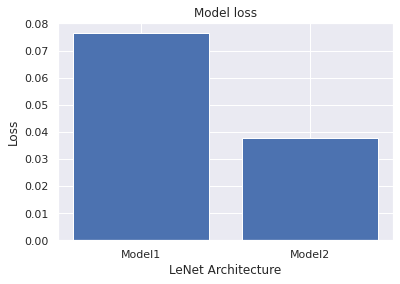

In [71]:
plt.bar(['Model1','Model2'],[score[0],score2[0]])
# plt.ylim([0.9, 1])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('LeNet Architecture')
print("Loss reduction in model2 is {:2f}% as compared to model1".format(((score[0]-score2[0])/score[0])*100))